# Model Selection
In this notebook, we will focus on model selection. We first import all libraries will be using, define some functions and import the dataset we will be using through out the notebook.

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time


%matplotlib inline
pd.plotting.register_matplotlib_converters()

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn import metrics

sns.set(style = "ticks")

Next, we apply the same transformations we have done in Load & Cleanse notebook to get the dataframe ready.

In [130]:
file_path = "../data/data.csv"
data = pd.read_csv(file_path, index_col = "consumer_id")

cols_with_na = [col for col in data.columns if data[col].isnull().any()]

data.drop(cols_with_na, axis = 1, inplace = True)

## Clustering and Labeling

The sample data is not labeled. So, we cannot use supervised classification algorithms. Therefore, we will first label the data using a clustering algorithm and then use a tree-based classification algorithm to train a classification model. This way, we will be able to classify unseen data based on the classification model we have built.

Lets have a look at the scatter plot pairs of the variables. This will allow us to visualise some cross-sections of the data. Majority of the columns are boolean. So, we will select a subset of columns that would give us better look into the clusters. This will also eliminate plots that do not offer much information for this purpose.

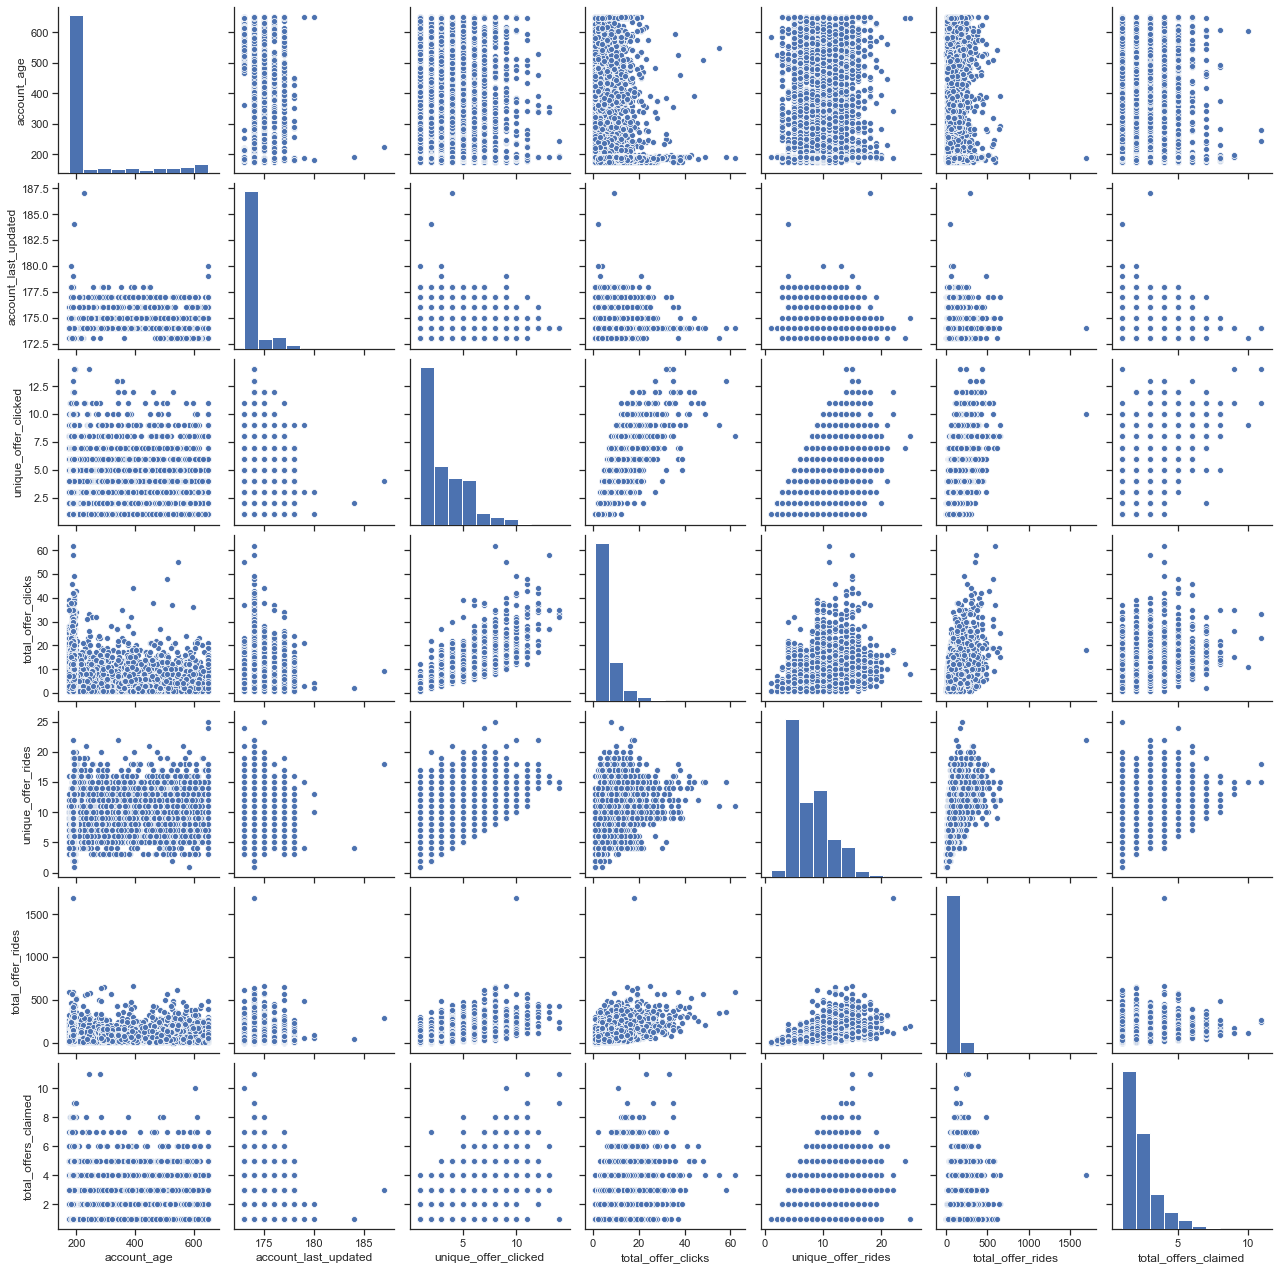

In [90]:
sub_cols = [
    "account_age", 
    "account_last_updated", 
    "unique_offer_clicked", 
    "total_offer_clicks", 
    "unique_offer_rides", 
    "total_offer_rides", 
    "total_offers_claimed"
]

sns.pairplot(data, vars=sub_cols)

In [136]:
start_time = time.time()
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, verbose = 1)
tsne_results = tsne.fit_transform(data)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-start_time))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.012s...
[t-SNE] Computed neighbors for 10000 samples in 0.415s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.878784
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.823303
[t-SNE] KL divergence after 300 iterations: 2.442084
t-SNE done! Time elapsed: 

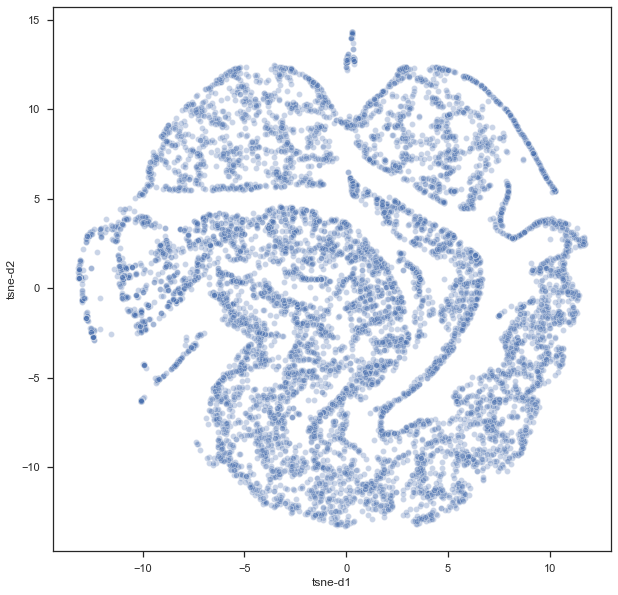

In [141]:
data["tsne-d1"] = tsne_results[:, 0]
data["tsne-d2"] = tsne_results[:, 1]

plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-d1", y="tsne-d2",
    palette=sns.color_palette("hls", 10),
    data=data,
    legend="full",
    alpha=0.3
)